In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn import tree





# resulting probability
using best aglorithm:
- predictions for test set. 
- prediction for a subset of the training set. about 1000

In [34]:
data = pd.read_csv('processed2.csv')

In [41]:
y = data['POVERTY'].to_numpy()

In [45]:
X = data.drop(columns=['POVERTY'])

In [49]:
X['live_with_mother'] = X['live_with_mother'].eq(1)
X['mother_alive'] = X['mother_alive'].eq(1)
X['live_with_father'] = X['live_with_father'].eq(1)
X['father_alive'] = X['father_alive'].eq(1)
X['read'] = X['read'].eq(1)
X['write'] = X['write'].eq(1)
X['under_19'] = X['under_19'].eq(1)


In [29]:
useless = [
    'psu', 'hh', 'idcode', 'Self_id', 
    'subjective_poverty_1', 'subjective_poverty_2', 'subjective_poverty_3', 'subjective_poverty_4', 'subjective_poverty_5', 
    'subjective_poverty_6', 'subjective_poverty_7', 'subjective_poverty_8', 'subjective_poverty_9', 'subjective_poverty_10']
data = data.drop(columns=useless)

In [53]:
X

,gender,family_role,age,marital_status,time_away,live_with_mother,mother_education,mother_alive,mother_death_age,mother_current_age,...,father_alive,father_death_age,father_current_age,read,write,education,preschool,enrollment_grouping,last_schoolyear_age,under_19
0,1,1,44,1,0,False,2,True,0,66,...,True,0,63,True,True,2,1,1,14,False
1,2,2,48,1,0,False,1,True,0,67,...,True,0,75,True,True,2,0,1,14,False
2,1,1,61,1,0,False,1,False,86,0,...,False,74,0,True,True,2,0,1,14,False
3,1,1,66,1,0,False,2,False,81,0,...,False,77,0,True,True,2,0,1,14,False
4,2,1,72,5,0,False,1,False,80,0,...,False,72,0,True,True,1,0,2,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5130,2,1,73,5,0,False,1,False,67,0,...,False,76,0,True,True,1,0,2,10,False
5131,1,1,60,1,0,False,1,False,73,0,...,False,82,0,True,True,2,0,1,14,False
5132,1,1,55,1,0,False,1,True,0,77,...,True,0,75,True,True,6,0,1,18,False
5133,1,1,53,1,0,True,2,True,0,73,...,False,75,0,True,True,9,0,2,22,False


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.19


In [67]:
from sklearn.model_selection import GridSearchCV

# Set up a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X, y)

# Get the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.22


In [69]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.21


# Chenruo's final data
Covariates used:

* role_group
* age_group
* kids_group
* marital_status
* away_group
* mother_education_group
* read_write
* education_group
* preschool_group
* enrollment_grouping

In [65]:
df = pd.read_csv('processed3.csv')

In [67]:
y = df['Self_Rank'].to_numpy()
uids = df['Self_id']

In [69]:
var_used = ['family_role_group', 'age_group', 'kids_group', 'marital_status', 'away_group', 
            'mother_education_group', 'read_write', 'education_group', 'preschool_group', 'enrollment_grouping',
           ]
X = df[var_used]

In [71]:
X.columns

Index(['family_role_group', 'age_group', 'kids_group', 'marital_status',
       'away_group', 'mother_education_group', 'read_write', 'education_group',
       'preschool_group', 'enrollment_grouping'],
      dtype='object')

In [73]:
dummies = pd.get_dummies(X['family_role_group'], prefix='role', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['age_group'], prefix='age', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['kids_group'], prefix='kids', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['marital_status'], prefix='marital', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['mother_education_group'], prefix='mother', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['away_group'], prefix='away', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['education_group'], prefix='education', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['preschool_group'], prefix='preschool', drop_first=True)
X = pd.concat([X, dummies], axis=1)

dummies = pd.get_dummies(X['enrollment_grouping'], prefix='enrollment', drop_first=True)
X = pd.concat([X, dummies], axis=1)



In [75]:
X.head()

,family_role_group,age_group,kids_group,marital_status,away_group,mother_education_group,read_write,education_group,preschool_group,enrollment_grouping,...,mother_3,mother_4,away_2,away_3,away_4,education_2,education_3,education_4,preschool_2,enrollment_2
0,1,5,2,1,1,2,1,1,2,1,...,False,False,False,False,False,False,False,False,True,False
1,2,5,2,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,1,7,2,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
3,1,7,1,1,1,2,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,7,1,5,1,1,1,1,1,2,...,False,False,False,False,False,False,False,False,False,True


In [77]:
old =[ 'family_role_group', 'age_group', 'kids_group', 'marital_status',
       'away_group', 'mother_education_group','education_group',
       'preschool_group', 'enrollment_grouping']
X = X.drop(columns=old)

In [79]:
X.head(3)

,read_write,role_2,role_3,role_4,role_5,age_2,age_3,age_4,age_5,age_6,...,mother_3,mother_4,away_2,away_3,away_4,education_2,education_3,education_4,preschool_2,enrollment_2
0,1,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Random Forest**

In [83]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.21


In [85]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

# Train the Random Forest model on the training data
rf.fit(X, y)

# # Make predictions on the test data
# y_pred = rf.predict_proba(X_test)



RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

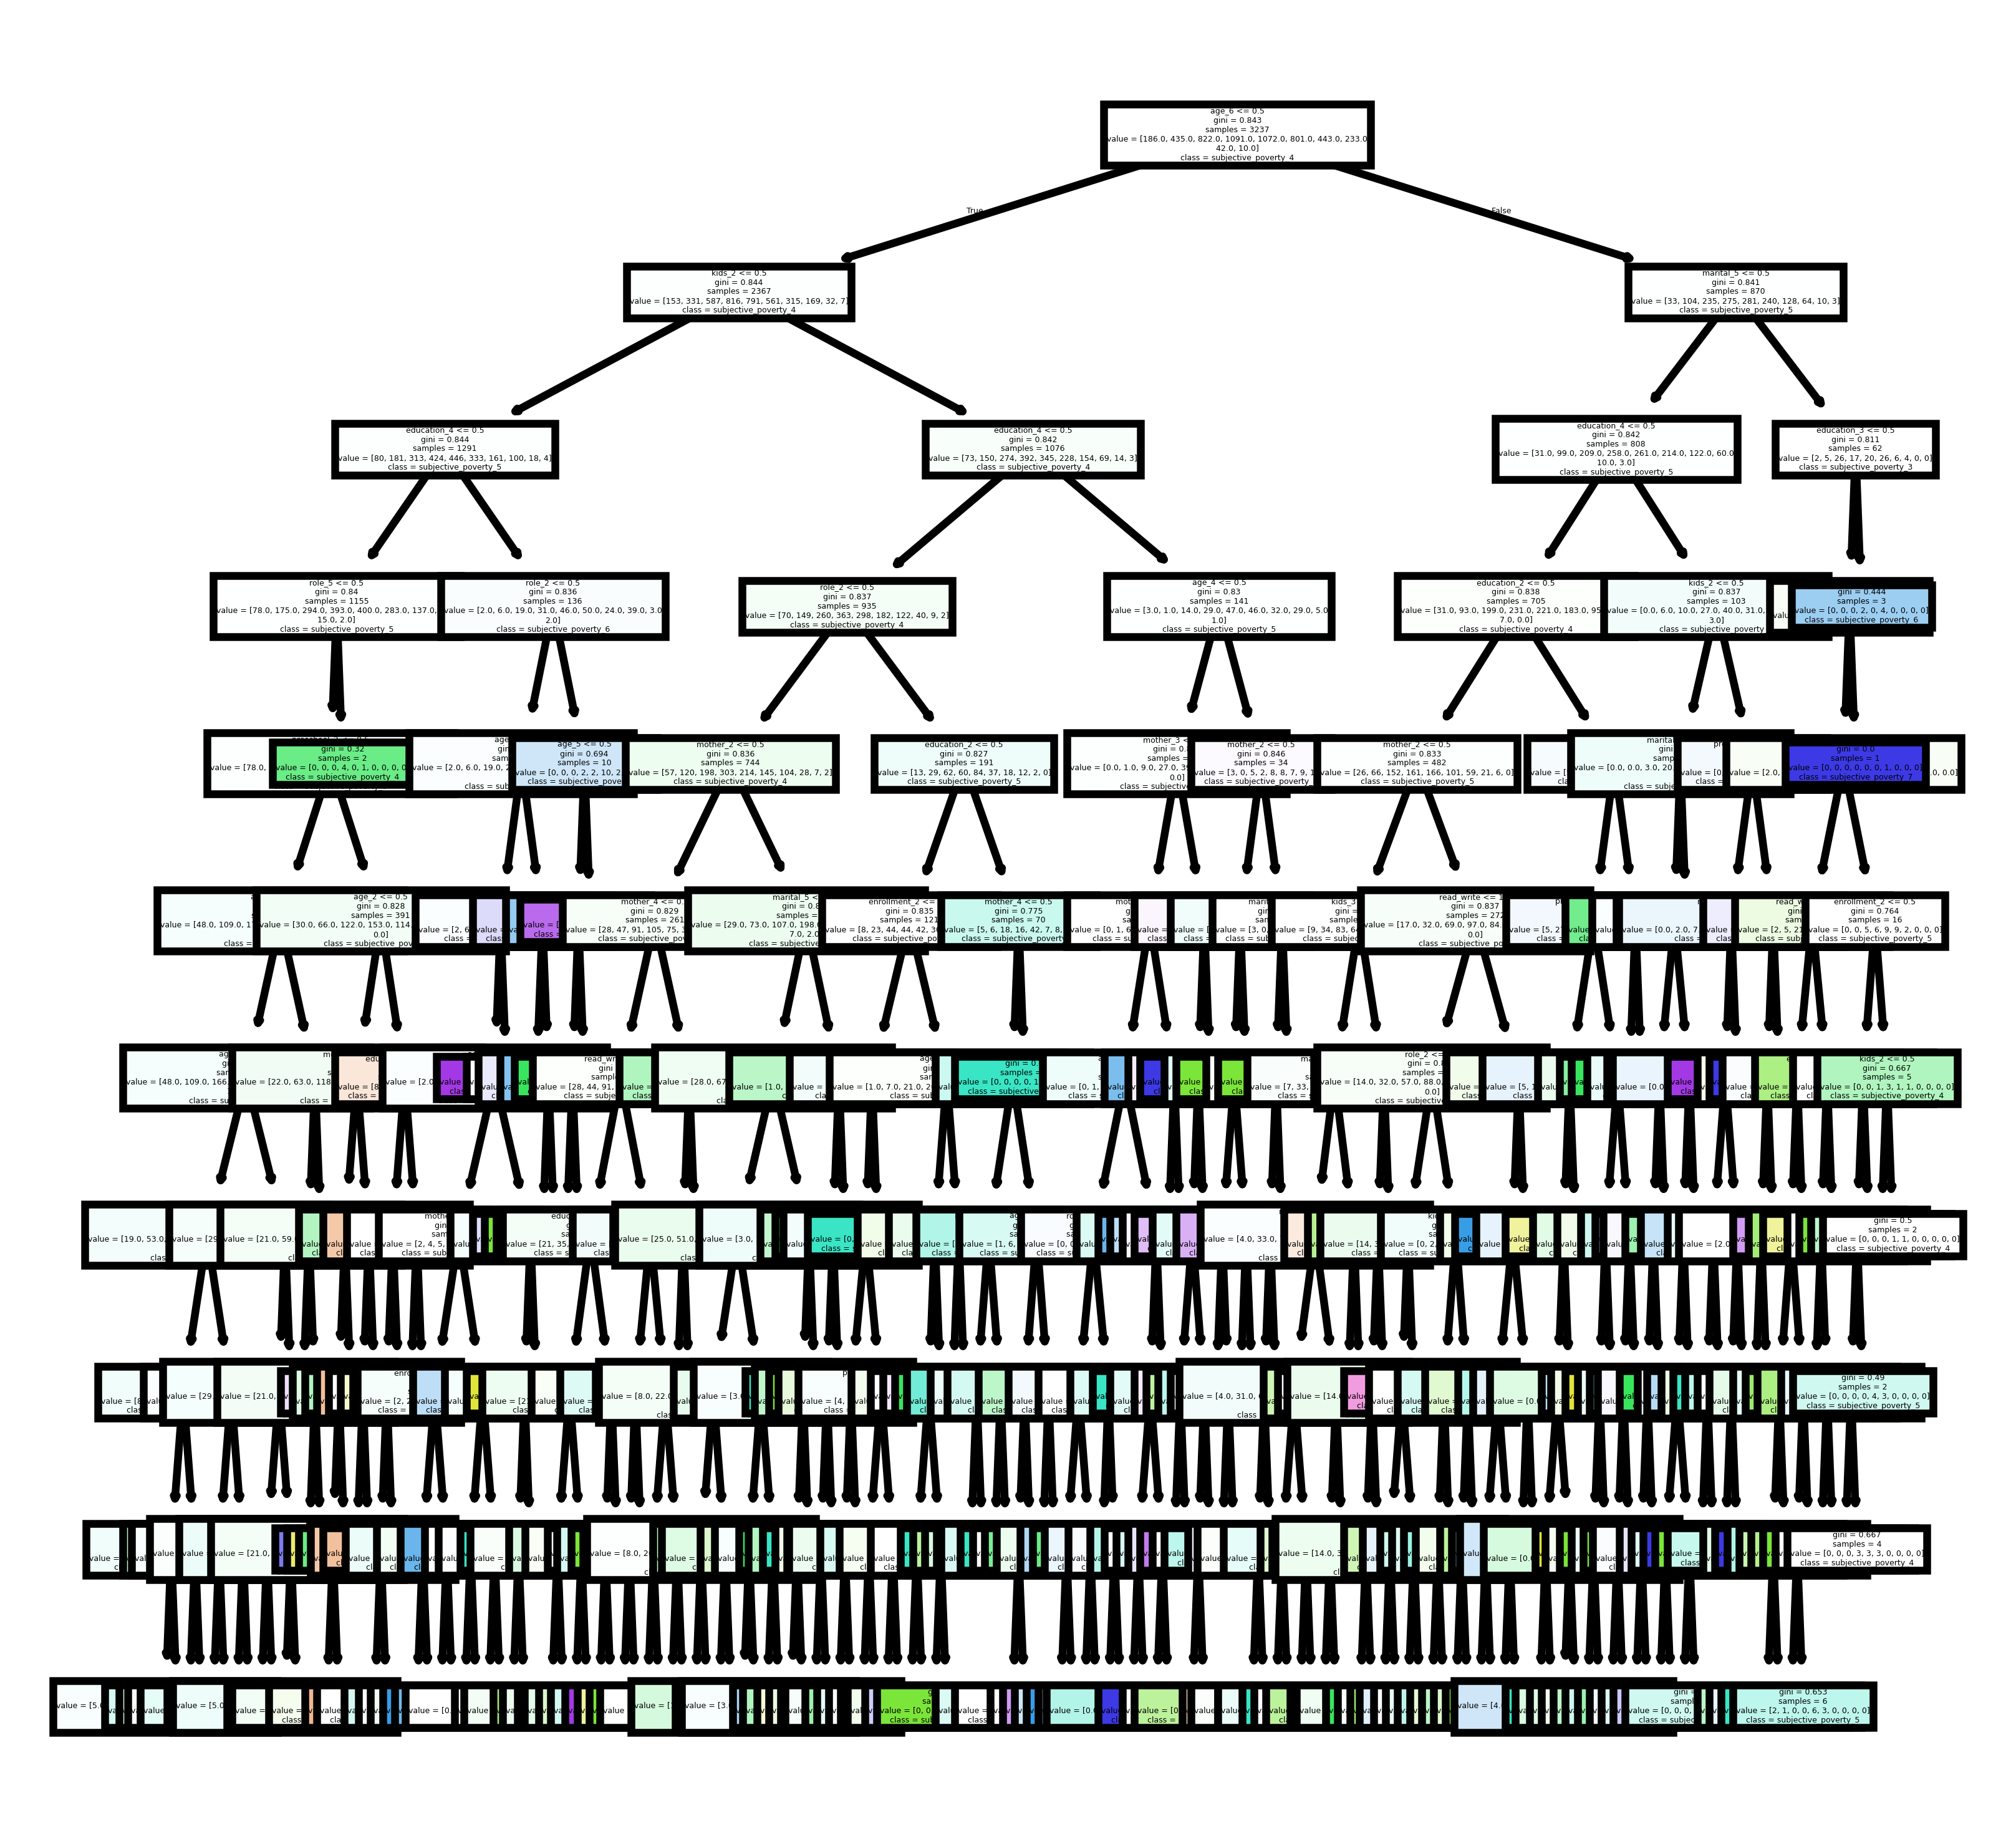

In [87]:
# first estimator
fn=X.columns
cn=['subjective_poverty_1', 'subjective_poverty_2', 'subjective_poverty_3', 'subjective_poverty_4', 'subjective_poverty_5', 
    'subjective_poverty_6', 'subjective_poverty_7', 'subjective_poverty_8', 'subjective_poverty_9', 'subjective_poverty_10']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)
index = 0 
tree.plot_tree(rf.estimators_[index],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_tree.png')

# Drawing a smaller tree on a subset of variables


In [104]:
df.columns
# X_small = 
small_cols = ['education', 'age', 'gender', 'read_write', 'preschool']
X_small = df[small_cols]

array([4, 1, 3, ..., 2, 5, 4])

In [118]:
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }
# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# grid_search.fit(X_small, y)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

In [146]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=5, max_depth=2, min_samples_split=2, random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_small, y)

# # Make predictions on the test data
# y_pred = rf.predict_proba(X_test)



RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42)

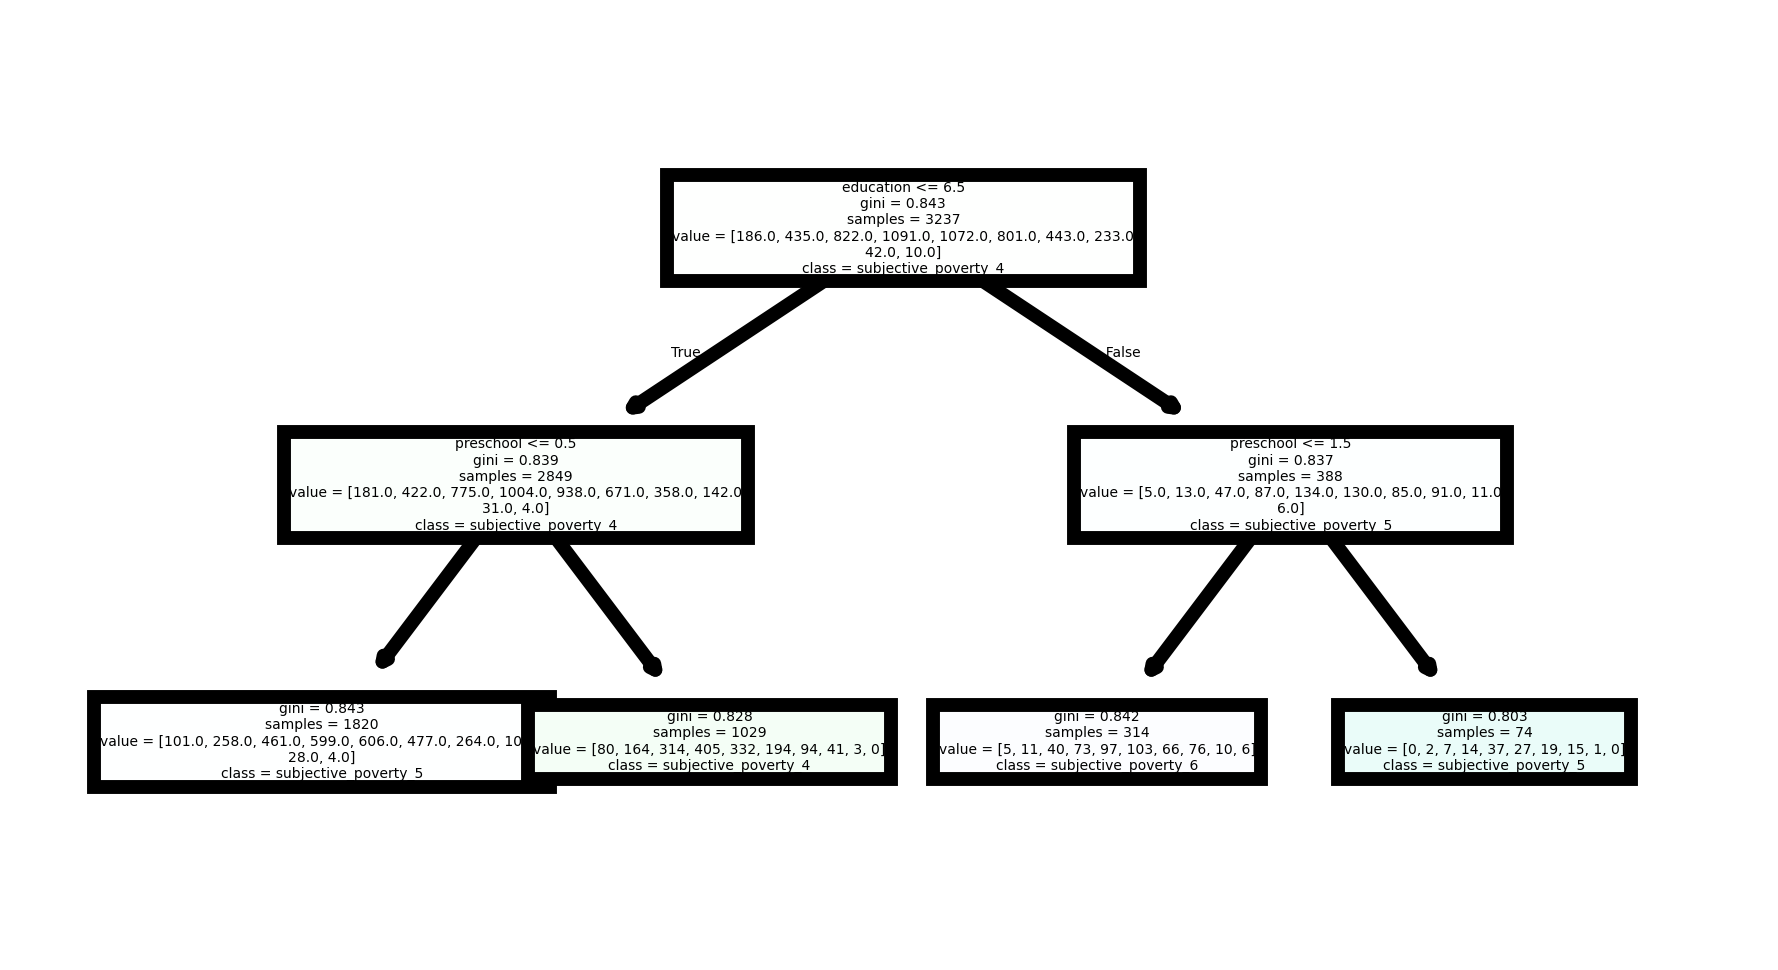

In [152]:
# first estimator
fn=X_small.columns
cn=['subjective_poverty_1', 'subjective_poverty_2', 'subjective_poverty_3', 'subjective_poverty_4', 'subjective_poverty_5', 
    'subjective_poverty_6', 'subjective_poverty_7', 'subjective_poverty_8', 'subjective_poverty_9', 'subjective_poverty_10']


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (2,1), dpi=1000)
index = 0 
tree.plot_tree(rf.estimators_[index],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_tree_small.png')